# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: MLOps**

### Tecnológico de Monterrey

## **Fase 1 - Avance de proyecto - Equipo 7**
### **Problema de asignación de créditos: South German Dataset.**

### Dante Cesar Cervantes Gutierrez - A01794585 
### Luis Angel Benitez Ortega - A01795165
### Ignacio Jose Aguilar Garcia - A00819762
### Alan Jasso Arenas - A01383272 
### Andrea Jelena Ramírez García - A01733905 

## **Construcción, ajuste y evaluación de Modelos de Machine Learning**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import yaml
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve


In [22]:

with open(r'../../params.yaml') as conf_file:
    config = yaml.safe_load(conf_file)

#print(config['data_load']['dataToModel'])

In [23]:
df = pd.read_csv(config['data_load']['dataToModel'])
#df = pd.read_csv(r"./data/Final_Model.csv")
#df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [24]:
X=df.drop(['credit_risk'],axis=1)
Y=df['credit_risk']
Y

0      1
1      1
2      1
3      1
4      1
      ..
491    0
492    0
493    0
494    0
495    0
Name: credit_risk, Length: 496, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
X_train.to_csv(config['data_split']['X_train_set_path'])
X_test.to_csv(config['data_split']['X_test_set_path'])
y_train.to_csv(config['data_split']['Y_train_set_path'])
y_test.to_csv(config['data_split']['Y_test_set_path'])

In [27]:
# Dividir los datos en conjunto de entrenamiento y prueba
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=1)

print('Dimensión de datos de entrada para entrenamiento y validación:', Xtrain.shape)
print('Dimensión de datos de entrada para prueba:', Xtest.shape)

print('Dimensión de variable de salida para entrenamiento y validación:', ytrain.shape)
print('Dimensión de variable de salida para prueba:', ytest.shape)

Dimensión de datos de entrada para entrenamiento y validación: (421, 17)
Dimensión de datos de entrada para prueba: (75, 17)
Dimensión de variable de salida para entrenamiento y validación: (421,)
Dimensión de variable de salida para prueba: (75,)


In [28]:
# Obtener estadísticas descriptivas de las columnas numéricas en X_train
Xtrain.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,present_residence,property,age,housing,number_credits,job,telephone,foreign_worker
count,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000
mean,2.714964,17.432304,2.603325,2.087886,7.561349,1.034483,3.301663,3.080760,2.627078,2.826603,2.308789,33.712589,1.857482,0.816795,2.907363,1.370546,1.978622
std,1.257166,8.300792,1.008010,1.576425,0.627384,0.451281,1.209771,1.094634,0.796497,1.115200,1.011667,10.482210,0.505797,0.197995,0.592387,0.483526,0.144812
min,1.000000,6.000000,0.000000,0.000000,5.624018,0.693147,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.000000,0.693147,1.000000,1.000000,1.000000
25%,2.000000,12.000000,2.000000,1.000000,7.157735,0.693147,2.000000,2.000000,2.000000,2.000000,1.000000,26.000000,2.000000,0.693147,3.000000,1.000000,2.000000
50%,3.000000,15.000000,2.000000,2.000000,7.572503,0.693147,3.000000,4.000000,3.000000,3.000000,2.000000,31.000000,2.000000,0.693147,3.000000,1.000000,2.000000
75%,4.000000,24.000000,4.000000,3.000000,8.032035,1.386294,4.000000,4.000000,3.000000,4.000000,3.000000,39.000000,2.000000,1.098612,3.000000,2.000000,2.000000
max,4.000000,42.000000,4.000000,6.000000,8.816260,1.791759,5.000000,4.000000,4.000000,4.000000,4.000000,64.000000,3.000000,1.386294,4.000000,2.000000,2.000000


In [29]:
ytrain_numeric = ytrain.astype(int)
result = ytrain_numeric.sum() / ytrain_numeric.shape[0]
result

0.7553444180522565

In [30]:
var_num=["duration", "amount", "age"]
var_nom=["status", "credit_history", "purpose", "savings", "personal_status_sex","housing"]
var_ord=["employment_duration", "installment_rate", "present_residence", "property", "number_credits","job"]
var_bin=["telephone", "foreign_worker", "credit_risk"]

In [31]:
# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps=[('impMediana', SimpleImputer(strategy='median')),('escalaNum', MinMaxScaler(feature_range=(1, 2)))])
num_pipeline_nombres = var_num

# Transformaciones a factores categóricos de entrada:
catImp_pipeline = Pipeline(steps=[('impModa', SimpleImputer(strategy='most_frequent'))])
catImp_pipeline_nombres = var_ord

catOHE_pipeline = Pipeline(steps=[('OneHotE', OneHotEncoder(drop='first', handle_unknown='ignore'))])
catOHE_pipeline_nombres = var_nom

# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers=[('numpipe', num_pipeline, num_pipeline_nombres),('catimp', catImp_pipeline, catImp_pipeline_nombres),
 ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)], remainder='passthrough')

columnasTransformer


ColumnTransformer(remainder='passthrough',
                  transformers=[('numpipe',
                                 Pipeline(steps=[('impMediana',
                                                  SimpleImputer(strategy='median')),
                                                 ('escalaNum',
                                                  MinMaxScaler(feature_range=(1,
                                                                              2)))]),
                                 ['duration', 'amount', 'age']),
                                ('catimp',
                                 Pipeline(steps=[('impModa',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['employment_duration', 'installment_rate',
                                  'present_residence', 'property',
                                  'number_credits', 'job']),
                                ('catohe',
                                 Pipeline(steps=[('OneHotE',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['status', 'credit_history', 'purpose',
                                  'savings', 'personal_status_sex',
                                  'housing'])])

In [32]:
# Ajustar el ColumnTransformer a los datos de entrenamiento
columnasTransformer.fit(Xtrain)

# Transformar los datos de entrenamiento y validación utilizando el ColumnTransformer ajustado
X_train_transformado = columnasTransformer.transform(Xtrain)
X_val_transformado = columnasTransformer.transform(Xtest)

# Convertir las etiquetas de entrenamiento y validación a tipo entero
ytrain = ytrain.astype(int)
yval = ytest.astype(int)

# Crear un clasificador Dummy con estrategia "stratified"
dummy_classifier = DummyClassifier(strategy="stratified", random_state=0)

# Ajustar el clasificador Dummy a los datos de entrenamiento transformados
dummy_classifier.fit(X_train_transformado, ytrain)

# Predecir las etiquetas de entrenamiento y validación utilizando el clasificador Dummy
y_train_pred = dummy_classifier.predict(X_train_transformado)
y_val_pred = dummy_classifier.predict(X_val_transformado)

# Calcular la exactitud (accuracy) de entrenamiento y validación
train_accuracy = accuracy_score(ytrain, y_train_pred)
val_accuracy = accuracy_score(yval, y_val_pred)

# Calcular el F1-Score de entrenamiento y validación
train_f1 = f1_score(ytrain, y_train_pred)
val_f1 = f1_score(yval, y_val_pred)

# Calcular la precisión (precision) de entrenamiento y validación
train_precision = precision_score(ytrain, y_train_pred)
val_precision = precision_score(yval, y_val_pred)

# Calcular la exhaustividad (recall) de entrenamiento y validación
train_recall = recall_score(ytrain, y_train_pred)
val_recall = recall_score(yval, y_val_pred)

# Imprimir las métricas de línea de base (baseline metrics)
print("Baseline Metrics:")
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Train F1-Score:", train_f1)
print("Validation F1-Score:", val_f1)
print("Train Precision:", train_precision)
print("Validation Precision:", val_precision)
print("Train Recall:", train_recall)
print("Validation Recall:", val_recall)

Baseline Metrics:
Train Accuracy: 0.6532066508313539
Validation Accuracy: 0.7333333333333333
Train F1-Score: 0.7725856697819314
Validation F1-Score: 0.8245614035087719
Train Precision: 0.7654320987654321
Validation Precision: 0.8245614035087719
Train Recall: 0.779874213836478
Validation Recall: 0.8245614035087719


In [33]:
# # Definir el rango de valores para los hiperparámetros a explorar
# param_grid = {'C': [0.1, 1, 10],
#               'kernel': ['linear', 'rbf', 'sigmoid'],
#               'gamma': [0.1, 1, 10]}

In [34]:
# Definir el rango de valores para los hiperparámetros a explorar
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['linear', 'rbf', 'sigmoid'],
              'gamma': [0.1, 1, 10, 100]
              }

In [35]:
# Crear el modelo SVM
SVM_model = SVC(random_state=0)
#SVM_model = SVC(C=1, kernel='rbf', gamma='scale', probability=True)

# Realizar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(SVM_model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_transformado, ytrain)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo en los conjuntos de entrenamiento y validación
train_accuracy = best_model.score(X_train_transformado, ytrain)
val_accuracy = best_model.score(X_val_transformado, yval)

print("Best Hyperparameters:", best_params)
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Train Accuracy: 0.8408551068883611
Validation Accuracy: 0.7466666666666667


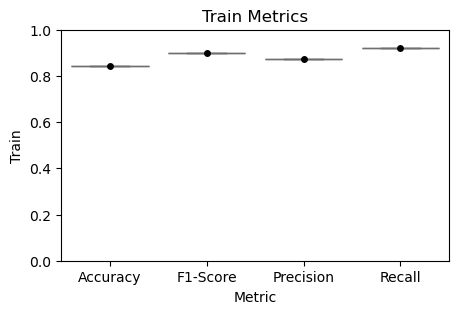

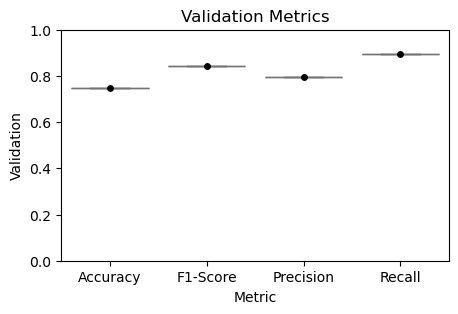

In [36]:
# Obtener las predicciones del mejor modelo
y_train_pred = best_model.predict(X_train_transformado)
y_val_pred = best_model.predict(X_val_transformado)

# Calcular todas las métricas
train_accuracy = accuracy_score(ytrain, y_train_pred)
val_accuracy = accuracy_score(yval, y_val_pred)
train_f1_score = f1_score(ytrain, y_train_pred)
val_f1_score = f1_score(yval, y_val_pred)
train_precision = precision_score(ytrain, y_train_pred)
val_precision = precision_score(yval, y_val_pred)
train_recall = recall_score(ytrain, y_train_pred)
val_recall = recall_score(yval, y_val_pred)

# Crear un DataFrame con las métricas
metrics_df = pd.DataFrame({'Metric': ['Accuracy', 'F1-Score', 'Precision', 'Recall'],
                           'Train': [train_accuracy, train_f1_score, train_precision, train_recall],
                           'Validation': [val_accuracy, val_f1_score, val_precision, val_recall]})

# Diagramas de caja y bigote de las métricas
plt.figure(figsize=(5, 3))
sns.boxplot(data=metrics_df, x='Metric', y='Train', color='skyblue')
sns.stripplot(data=metrics_df, x='Metric', y='Train', color='black', size=5)
plt.title('Train Metrics')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(data=metrics_df, x='Metric', y='Validation', color='lightgreen')
sns.stripplot(data=metrics_df, x='Metric', y='Validation', color='black', size=5)
plt.title('Validation Metrics')
plt.ylim(0, 1)
plt.show()

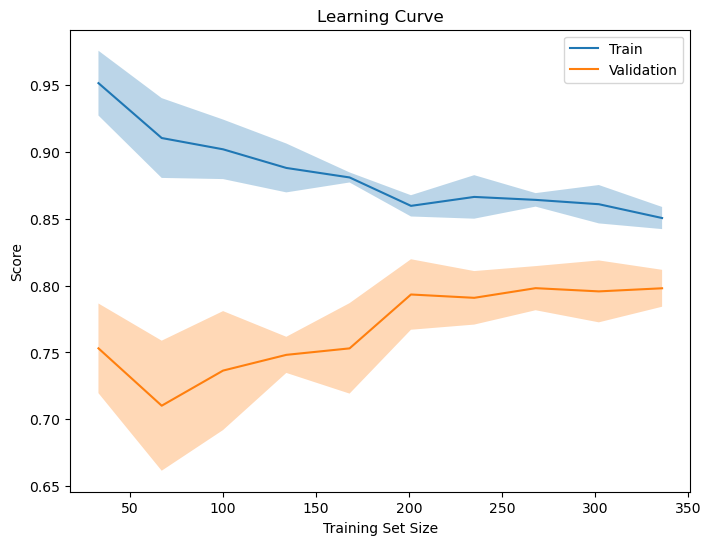

In [37]:
# Función para generar las curvas de aprendizaje
def plot_learning_curve(estimator, X, y, cv, train_sizes):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)

    # Calcular los promedios y las desviaciones estándar de las puntuaciones
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Graficar las curvas de aprendizaje
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label='Train')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3)
    plt.plot(train_sizes, val_scores_mean, label='Validation')
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.3)
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.legend()
    plt.title('Learning Curve')
    plt.show()

# Definir los tamaños de conjunto de entrenamiento a evaluar
train_sizes = np.linspace(0.1, 1.0, 10, 100)

# Generar las curvas de aprendizaje
plot_learning_curve(best_model, X_train_transformado, ytrain, cv=5, train_sizes=train_sizes)

In [38]:
print("Best Hyperparameters:", best_params)
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Train Accuracy: 0.8408551068883611
Validation Accuracy: 0.7466666666666667


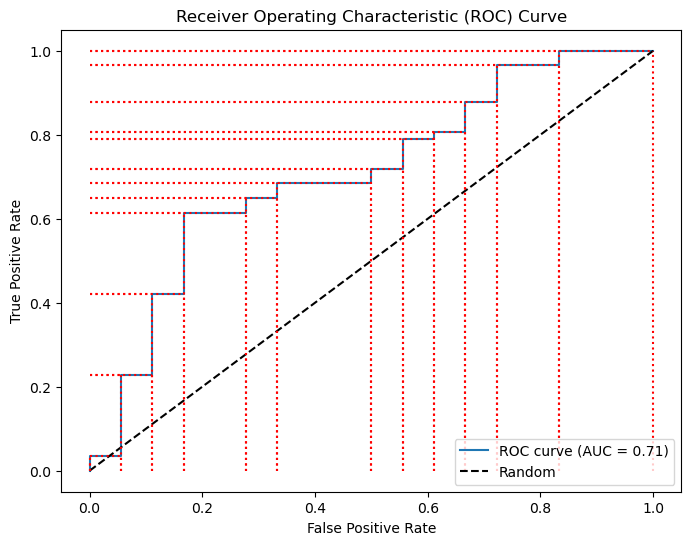

In [39]:
from sklearn import metrics

# Get the scores using decision_function
scores_val = best_model.decision_function(X_val_transformado)

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(yval, scores_val)

#cm=confusion_matrix(ytest, y_val_pred)

# Calculate the AUC
auc = roc_auc_score(yval, scores_val)

# Plot the ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.hlines(tpr, 0, fpr, colors='r', linestyles='dotted')  # Se calcula TPrate y FPrate con base a threshold=0.5
plt.vlines(fpr, 0, tpr, colors='r', linestyles='dotted')
plt.show()

In [40]:
# Obtener los puntajes utilizando decision_function
scores_val = best_model.decision_function(X_val_transformado)

# Calcular el AUC
auc = roc_auc_score(yval, scores_val)

print('AUC:', auc)

AUC: 0.7076023391812866


In [41]:
# Obtener los puntajes utilizando decision_function
scores_val = best_model.decision_function(X_val_transformado)

# Crear una lista para almacenar los valores de f1-score
f1_scores = []

# Probar diferentes umbrales de predicción
thresholds = np.linspace(np.min(scores_val), np.max(scores_val), 100)
for threshold in thresholds:
    # Convertir los puntajes en etiquetas binarias utilizando el umbral
    y_pred = np.where(scores_val >= threshold, 1, 0)
    # Calcular el f1-score utilizando las etiquetas predichas
    f1 = f1_score(yval, y_pred)
    # Agregar el valor del f1-score a la lista
    f1_scores.append(f1)

# Encontrar el umbral que maximiza el f1-score
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1_score = np.max(f1_scores)

print('Mejor umbral:', best_threshold)
print('Mejor F1-Score:', best_f1_score)

Mejor umbral: -1.1646569085079714
Mejor F1-Score: 0.8769230769230769


In [42]:
# Obtener los puntajes utilizando decision_function
scores_val = best_model.decision_function(X_val_transformado)

# Crear una lista para almacenar los valores de g-mean
g_mean_scores = []

# Probar diferentes umbrales de predicción
thresholds = np.linspace(np.min(scores_val), np.max(scores_val), 100)
for threshold in thresholds:
    # Convertir los puntajes en etiquetas binarias utilizando el umbral
    y_pred = np.where(scores_val >= threshold, 1, 0)
    # Calcular la matriz de confusión utilizando las etiquetas predichas
    tn, fp, fn, tp = confusion_matrix(yval, y_pred).ravel()
    # Calcular el g-mean utilizando los valores de la matriz de confusión
    g_mean = np.sqrt(tp / (tp + fn) * tn / (tn + fp))
    # Agregar el valor del g-mean a la lista
    g_mean_scores.append(g_mean)

# Encontrar el umbral que maximiza el g-mean
best_threshold = thresholds[np.argmax(g_mean_scores)]
best_g_mean = np.max(g_mean_scores)

print('Mejor umbral:', best_threshold)
print('Mejor G-Mean:', best_g_mean)

Mejor umbral: 1.43195883905248
Mejor G-Mean: 0.6945906278887423
